In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy.stats import norm, shapiro
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.proportion import proportions_ztest

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Normal Random Variables

Normal distributions are important in statistics and are often used in the natural and social sciences to represent real-valued random variables whose distributions are not known.

Their importance is partly due to the **central limit theorem**. 

It states that, under some conditions, the **average** of many samples (observations) of a random variable with finite **mean** ($\mu$) and **variance** ($\sigma$) is itself a random variable—whose distribution converges to a normal distribution as the number of samples increases.

\begin{equation}\tag{CLT}
\bar{X} \sim \mathcal{N}\Big(\mu, \frac{\sigma}{\sqrt{n}}\Big)
\end{equation}

In [4]:
# Parameters for the distribution
mu, sigma = 0, 1

## Distribution

The probability density function (pdf) of the normal distribution is

$$f(x, \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\big(\frac{x-\mu}{\sigma}\big)^2}$$

In [10]:
# Calculate PDF at a specific point
value=0
print(f"PDF at {value}: {norm.pdf(value, loc=mu, scale=sigma)}")

PDF at 0: 0.3989422804014327


In [9]:
#  Calculate CDF at a specific point
value = 3
print(f"CDF at {value}: {norm.cdf(value, loc=mu, scale=sigma)}")

CDF at 3: 0.9986501019683699


In [8]:
# Calculate PPF (inverse of CDF)
percent = 0.975
print(f"PPF at {percent}: {norm.ppf(percent, loc=mu, scale=sigma)}")

PPF at 0.975: 1.959963984540054


## Visualization

In [12]:
# Generate 10000 random numbers with mean=0 and standard deviation=1 (standard normal distribution)
data = np.random.normal(loc=mu, scale=sigma, size=10000)

# Generate 100 random numbers with mean=0 and standard deviation=1
data_custom = np.random.normal(loc=mu, scale=sigma, size=100)

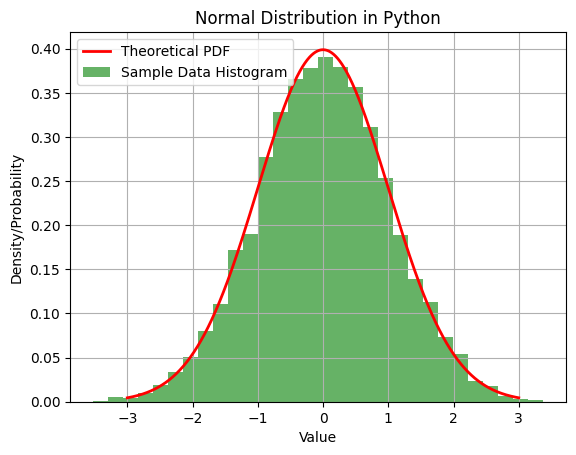

In [13]:
# Generate x values for the theoretical curve
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)

# Calculate the PDF for the theoretical curve
pdf = norm.pdf(x, loc=mu, scale=sigma)

# Plot the theoretical curve
plt.plot(x, pdf, 'r-', lw=2, label='Theoretical PDF')

# Plot a histogram of random samples for comparison
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Sample Data Histogram')

plt.xlabel('Value')
plt.ylabel('Density/Probability')
plt.title('Normal Distribution in Python')
plt.legend()
plt.grid(True)
plt.show()

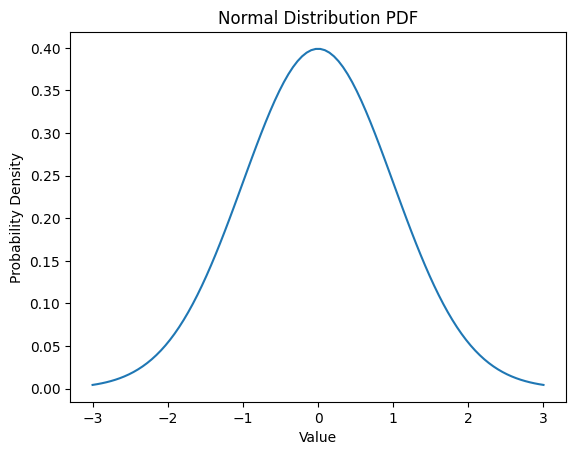

In [14]:
# Plotting the PDF
x = np.linspace(-3, 3, 100)
plt.plot(x, norm.pdf(x, loc=mu, scale=sigma))
plt.title("Normal Distribution PDF")
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.show()

In [11]:
# Generate random variates (similar to numpy.random.normal)
random_variates = norm.rvs(loc=mu, scale=sigma, size=100)
# print(f"Random variates from scipy: {random_variates}")

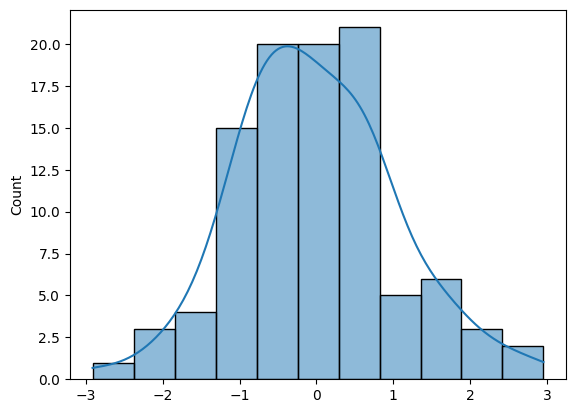

In [12]:
sns.histplot(data=random_variates, kde=True)
plt.show()

## Hypothesis testing

**Hypothesis testing** with a normal distribution determines if a sample mean significantly differs from a known population mean, assuming the population is normally distributed with a known variance. 

It involves defining null ($H_{0}$) and alternative ($H_{1}$) hypotheses, calculating a test statistic ($\bar{X}$ or $z$-score), and comparing it to a significance level ($\alpha$) to accept or reject the null hypothesis. 

\begin{equation}\tag{z-test}
Z = \frac{\bar{X}-\mu}{\sigma/\sqrt{n}}
\end{equation}

In $z$-**test**, the test statistic follows the **standard normal distribution** ($Z$-distribution) under the **null hypothesis** $H_0$.

### One-Sample Z-Test

**One Sample** $z$-**test** (single sample $z$-test) is used to compare the sample mean $\bar{X}$ with some specific or hypothesized value $\mu_0$(known mean of the population). 

**One Sample** $z$-**test** checks whether the sample comes from a known population where population mean ($\mu_0$) and standard deviation ($\sigma$) should be known.


- The dependent variable should have an approximately standard normal distribution i.e. $\mathcal{N}(0, 1)$ (Shapiro-Wilks Test)
- Population standard deviation $\sigma$ should be known
- Observations are independent of each other and randomly drawn from a population
- The sample size should be large ($n \geq 30$)

The **one-sample** $z$-**test** compares a sample mean $\bar{X}$ to a known population mean.

**Null hypothesis**: sample mean equals population mean, $\mathrm{H}_{0}:\mu =\mu_{0}$. 

In [8]:
random_variates = norm.rvs(loc=mu, scale=sigma, size=10000)

In [9]:
# Perform Shapiro-Wilk Test
statistic, p_value = shapiro(random_variates)

print(f'Statistic: {statistic:.4f}')
print(f'P-value: {p_value:.4f}')

Statistic: 0.9998
P-value: 0.7361


In [10]:
# Interpretation
alpha = 0.05
if p_value > alpha:
    print("Data looks Gaussian (fail to reject null hypothesis)")
else:
    print("Data does not look Gaussian (reject null hypothesis)")

Data looks Gaussian (fail to reject null hypothesis)


In [11]:
# Perform the z-test
z_statistic, p_value = ztest(random_variates, value=mu)

print(f"Z-Statistic: {z_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

Z-Statistic: -0.0027
P-Value: 0.9978


### Two sample $z$-test (unpaired or independent $z$-test)

The **two-sample** (unpaired or independent) $z$-**test** calculates if the means of two independent groups are equal or significantly different from each other. 

\begin{equation}\tag{2-z-test}
Z = \frac{(\bar{X_1}-\bar{X_2})-(\mu_1-\mu_2)}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}}
\end{equation}

The **two-sample** $z$-**test** compares the means of two independent samples 

**Null hypothesis**: means are equal, $\mathrm{H}_{0}:\mu _{1}=\mu _{2}$. 

Unlike the $t$-test, $z$-test is performed when the population means and standard deviation are known.

> If the sample size is large ($n\geq30$) and population standard deviation ($\sigma_1$ and $\sigma_2$) is unknown, you can also estimate the population standard deviation from the sample.

- Dependent variables for samples should have an approximately standard normal distribution (Shapiro-Wilks Test)
- Population standard deviations ($\sigma_1$ and $\sigma_2$) should be known
- Observations are independent of each other and randomly drawn from a population
- The sample size should be large ($n\geq30$)

In [12]:
mu1, mu2 = 4, 8
sigma1, sigma2 = 2, 1
random_variates1 = norm.rvs(loc=mu1, scale=sigma1, size=1000)
random_variates2 = norm.rvs(loc=mu2, scale=sigma2, size=1000)

In [13]:
# Perform Shapiro-Wilk Test
statistic, p_value = shapiro(random_variates1)

print(f'Statistic: {statistic:.4f}')
print(f'P-value: {p_value:.4f}')

Statistic: 0.9984
P-value: 0.4666


In [14]:
# Perform Shapiro-Wilk Test
statistic, p_value = shapiro(random_variates2)

print(f'Statistic: {statistic:.4f}')
print(f'P-value: {p_value:.4f}')

Statistic: 0.9994
P-value: 0.9908


In [15]:
# Perform the two-sample z-test
z_statistic, p_value = ztest(x1=random_variates1, x2=random_variates2, 
                             value=0, alternative='two-sided',
                             usevar='unequal', ddof=1.0)

print(f"Z-Statistic: {z_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

Z-Statistic: -56.9474
P-Value: 0.0000


In [16]:
if p_value < alpha:
    print("Reject the null hypothesis: The sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the sample mean and population mean.")

Reject the null hypothesis: The sample mean is significantly different from the population mean.


### Paired $z$-test (dependent $z$-test)

This test is used to test hypotheses about population proportions, commonly in $A/B$ testing scenarios. 

**Paired** $z$-**test*** is used for checking whether there is difference between the two paired samples or not.

- Differences between the two dependent variables follow an approximately standard normal distribution (Shapiro-Wilks Test)
- The independent variable should have a pair of dependent variables
- Observations are sampled independently from each other
- Population standard deviations ($\sigma_{\delta}$) for difference should be known
- The sample size should be large ($n\geq30$). 

### Paired $z$-test

## References

* [Equation Editor for online mathematics](https://editor.codecogs.com/)
* [Normal Distribution](https://en.wikipedia.org/wiki/Normal_distribution)